In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time #helper libraries

Using TensorFlow backend.


In [2]:
# file is downloaded from finance.yahoo.com, 1.1.1997-1.1.2017
# training data = 1.1.1997 - 1.1.2007
# test data = 1.1.2007 - 1.1.2017
input_file="DIS.csv"

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
np.random.seed(5)

# load the dataset
df = read_csv(input_file, header=None, index_col=None, delimiter=',')


In [3]:

# take close price column[5]
all_y = df[5].values
dataset=all_y.reshape(-1, 1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [4]:
# split into train and test sets, 50% test data, 50% training data
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1, timestep 240
look_back = 240
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [5]:
# create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=300, batch_size=240, verbose=1)



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/300





2276/2276 [==============================] - 1s - loss: 0.0039     
Epoch 2/300
2276/2276 [==============================] - 0s - loss: 0.0013     
Epoch 3/300
2276/2276 [==============================] - 0s - loss: 8.5767e-04     
Epoch 4/300
2276/2276 [==============================] - 0s - loss: 7.1752e-04     
Epoch 5/300
2276/2276 [==============================] - 0s - loss: 6.1392e-04     
Epoch 6/300
2276/2276 [==============================] - 0s 

2276/2276 [==============================] - 0s - loss: 1.4445e-04     
Epoch 49/300
2276/2276 [==============================] - 0s - loss: 1.4055e-04     
Epoch 50/300
2276/2276 [==============================] - 0s - loss: 1.4114e-04     
Epoch 51/300
2276/2276 [==============================] - 0s - loss: 1.3487e-04     
Epoch 52/300
2276/2276 [==============================] - 0s - loss: 1.3491e-04     
Epoch 53/300
2276/2276 [==============================] - 0s - loss: 1.3437e-04     
Epoch 54/300
2276/2276 [==============================] - 0s - loss: 1.4590e-04     
Epoch 55/300
2276/2276 [==============================] - 0s - loss: 1.3050e-04     
Epoch 56/300
2276/2276 [==============================] - 0s - loss: 1.2243e-04     
Epoch 57/300
2276/2276 [==============================] - 0s - loss: 1.2437e-04     
Epoch 58/300
2276/2276 [==============================] - 0s - loss: 1.2898e-04     
Epoch 59/300
2276/2276 [==============================] - 0s - loss: 1.2435e-0

2276/2276 [==============================] - 0s - loss: 7.0602e-05     
Epoch 144/300
2276/2276 [==============================] - 0s - loss: 7.5173e-05     
Epoch 145/300
2276/2276 [==============================] - 0s - loss: 7.0695e-05     
Epoch 146/300
2276/2276 [==============================] - 0s - loss: 6.8614e-05     
Epoch 147/300
2276/2276 [==============================] - 0s - loss: 7.0223e-05     
Epoch 148/300
2276/2276 [==============================] - 0s - loss: 7.4449e-05     
Epoch 149/300
2276/2276 [==============================] - 0s - loss: 7.2144e-05     
Epoch 150/300
2276/2276 [==============================] - 0s - loss: 7.0375e-05     
Epoch 151/300
2276/2276 [==============================] - 0s - loss: 7.3658e-05     
Epoch 152/300
2276/2276 [==============================] - 0s - loss: 7.7643e-05     
Epoch 153/300
2276/2276 [==============================] - 0s - loss: 7.8534e-05     
Epoch 154/300
2276/2276 [==============================] - 0s - loss

2276/2276 [==============================] - 0s - loss: 5.2245e-05     
Epoch 239/300
2276/2276 [==============================] - 0s - loss: 4.9139e-05     
Epoch 240/300
2276/2276 [==============================] - 0s - loss: 5.1822e-05     
Epoch 241/300
2276/2276 [==============================] - 0s - loss: 4.7164e-05     
Epoch 242/300
2276/2276 [==============================] - 0s - loss: 4.9227e-05     
Epoch 243/300
2276/2276 [==============================] - 0s - loss: 5.2614e-05     
Epoch 244/300
2276/2276 [==============================] - 0s - loss: 5.2044e-05     
Epoch 245/300
2276/2276 [==============================] - 0s - loss: 4.9768e-05     
Epoch 246/300
2276/2276 [==============================] - 0s - loss: 4.7130e-05     
Epoch 247/300
2276/2276 [==============================] - 0s - loss: 5.2683e-05     
Epoch 248/300
2276/2276 [==============================] - 0s - loss: 5.1462e-05     
Epoch 249/300
2276/2276 [==============================] - 0s - loss

In [6]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [7]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.58 RMSE
Test Score: 5.16 RMSE


In [8]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

testPrices:
testPredictions:
[[27.783195]
 [28.027803]
 [28.276947]
 ...
 [92.94843 ]
 [93.16047 ]
 [92.76533 ]]


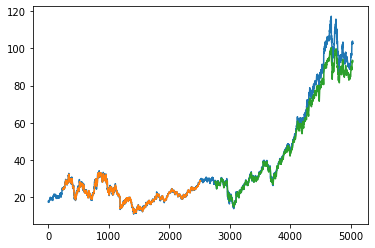

In [9]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])

print('testPredictions:')
print(testPredict)

# export prediction and actual prices
df = pd.DataFrame(data={"prediction": np.around(list(testPredict.reshape(-1)), decimals=2), "test_price": np.around(list(testPrices.reshape(-1)), decimals=2)})
df.to_csv("lstm_result.csv", sep=';', index=None)

# plot the actual price, prediction in test, actual price=blue line
plt.plot(testPredictPlot)
plt.show()